# Primates morphology
The `primates-morphology.csv` file contains **coordinates** derived from markers of skull features from various species of primates.

**Goal**:
Read the data and use unsupervised machine learning methods to separate the groups belong to different species.

**Must haves**:
- Demonstrate a good working method, and explain why it works. 
- Demonstrate a non-working method, and explain why it doesn't work.

For each method that you try, give a short argument of why the method is worth trying. Properly inspect and preprocess data:
- Missing data
- Skewness
- Distribution
- Linearity
- Correlations

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

todo
- config.yaml

In [31]:
df = pd.read_csv('data/primates-morphology.csv').drop(columns='Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,0.586941,-0.043639,-0.518699,-1.051100,0.542354,Pr,Presbytis,rubicunda,M,A
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.653851,0.718319,0.798722,-0.396749,0.844772,Pr,Presbytis,rubicunda,F,A


In [32]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,0.360452,0.513323,0.043604,0.294724,-0.003514,Hl,Hylobates,lar,F,A
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-0.368755,-0.173323,-0.627292,0.092090,0.444992,Hl,Hylobates,lar,F,A
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,-0.033229,0.434486,-0.158110,-0.416191,0.160474,Hl,Hylobates,lar,F,A
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,0.125275,-0.018511,0.080169,-0.235063,0.317110,Hl,Hylobates,lar,F,A
164,-88.663448,-43.835382,74.681197,19.086880,9.755993,-9.499983,2.948722,-2.992005,-0.666312,0.333317,...,0.141954,-0.947492,0.060862,-0.297479,0.723835,Hl,Hylobates,lar,F,A


In [33]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', 'Abbreviation', 'Genus', 'Species', 'Sex',
       'Age'],
      dtype='object')

In [34]:
# Only species are important in this example
X = df.iloc[:, :30]
y = df['Species']

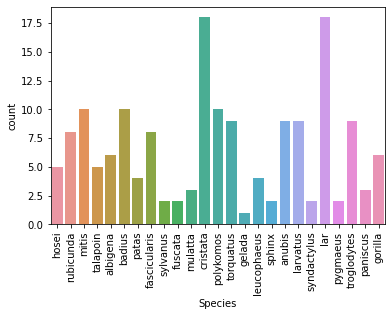

25


In [35]:
sns.countplot(x=y, label='Count')
plt.xticks(rotation=90)
plt.show()

print(len(y.unique()))

There are 25 different species in total. The dataset is clearly imbalanced. Hopefully they are still fundamentally clustered, and the metrics don't really have trouble.

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       165 non-null    float64
 1   1       165 non-null    float64
 2   2       165 non-null    float64
 3   3       165 non-null    float64
 4   4       165 non-null    float64
 5   5       165 non-null    float64
 6   6       165 non-null    float64
 7   7       165 non-null    float64
 8   8       165 non-null    float64
 9   9       165 non-null    float64
 10  10      165 non-null    float64
 11  11      165 non-null    float64
 12  12      165 non-null    float64
 13  13      165 non-null    float64
 14  14      165 non-null    float64
 15  15      165 non-null    float64
 16  16      165 non-null    float64
 17  17      165 non-null    float64
 18  18      165 non-null    float64
 19  19      165 non-null    float64
 20  20      165 non-null    float64
 21  21      165 non-null    float64
 22  22

There are no missing values.

In [37]:
from functions import plot_distribution

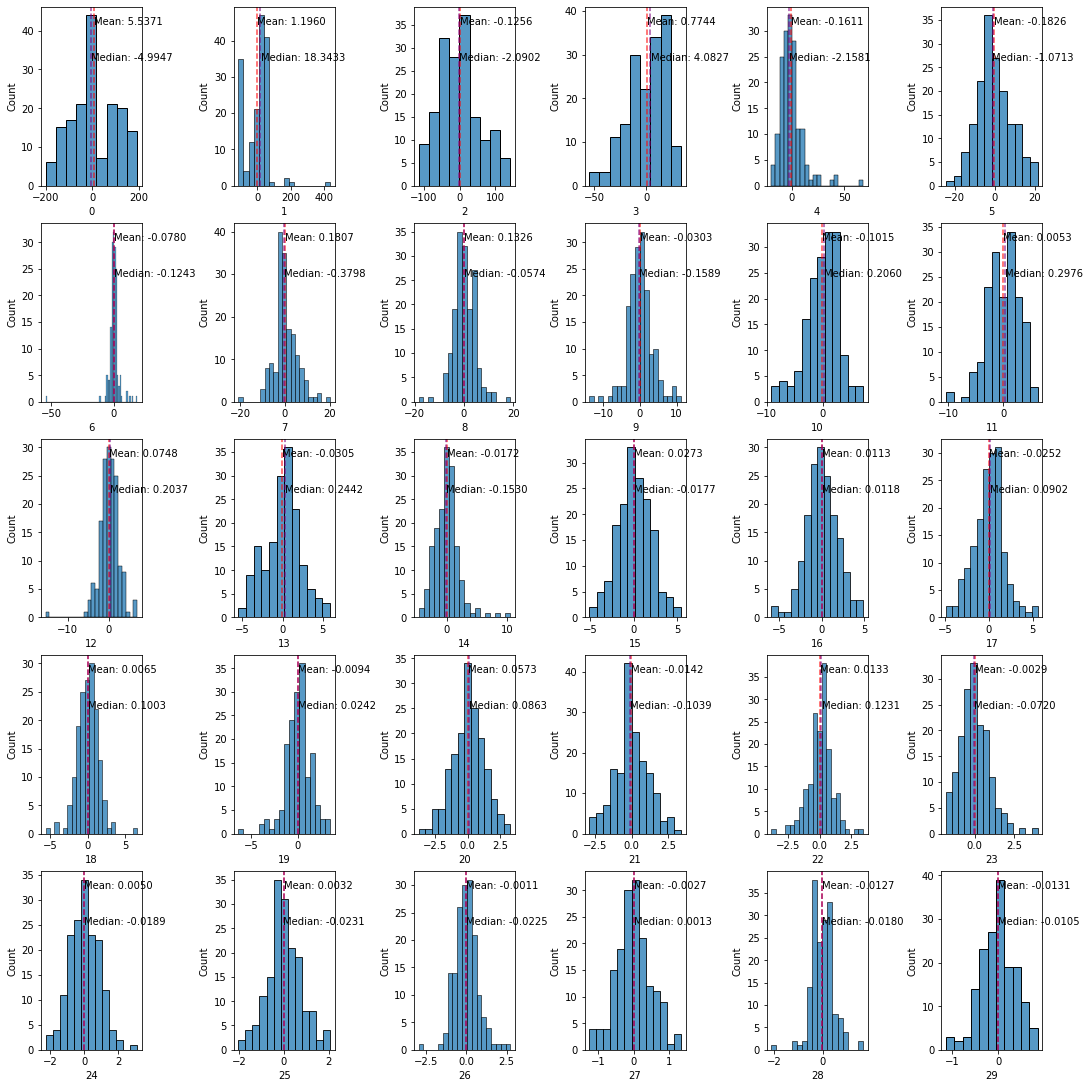

In [38]:
plot_distribution(X, 5, 6)

It can clearly be seen that there are some outliers, some disstributions are positively skewed, some negatively and some are Gaussian. 

<AxesSubplot:>

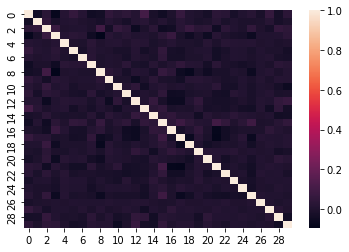

In [39]:
sns.heatmap(X.corr())

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from functions import scree_plot, component_plot

In [41]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [45]:
# also just select not high correlated features HERE


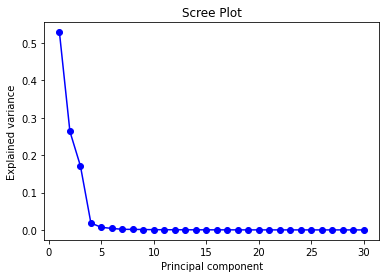

In [46]:
# It doesn't make sense to scale the coordinates, as they are a coordinate space

pca = PCA()
pca.fit(X)

scree_plot(pca)

Well, PCA is obviously not useful with this data............. It's not linearly separable.

In [47]:
from sklearn.manifold import TSNE

In [56]:
tsne = TSNE(method='barnes_hut', verbose=1, perplexity=40, n_iter=4000)
Y = tsne.fit_transform(X)

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 165 samples in 0.000s...
[t-SNE] Computed neighbors for 165 samples in 0.034s...
[t-SNE] Computed conditional probabilities for sample 165 / 165
[t-SNE] Mean sigma: 71.662980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.840458
[t-SNE] KL divergence after 950 iterations: 0.066675


<AxesSubplot:>

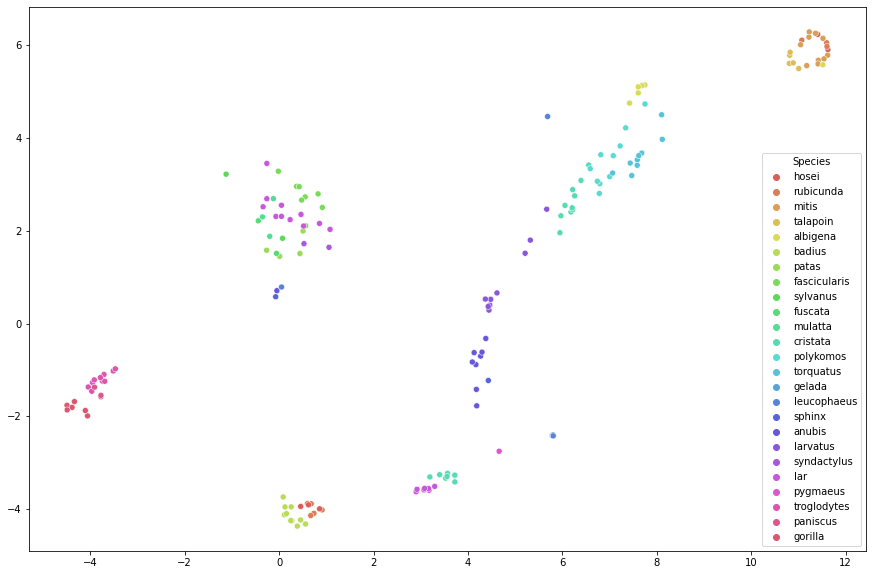

In [57]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=y, alpha=1, palette=sns.color_palette('hls', 25))

Visualizing this is impossible. Therefore create it in subplots.
Plot(y1, y2, others). However it is non-linearly seperable?

What about dendrogram for kmeans?

In [52]:
y.unique().size

25

In [53]:
from sklearn.cluster import KMeans

C:\Users\ddlat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:>

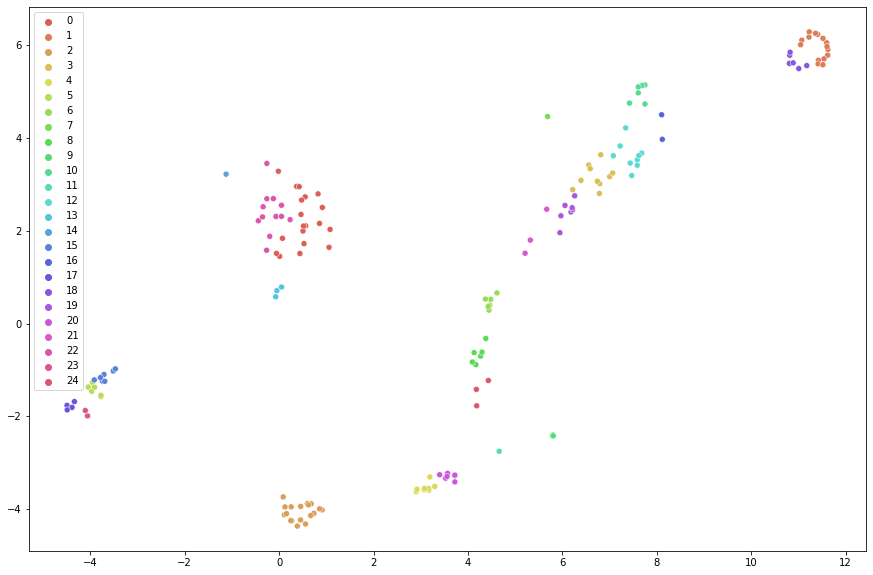

In [61]:
k = y.unique().size

kmeans = KMeans(n_clusters=k, init='k-means++')
kY = kmeans.fit_predict(X)

plt.figure(figsize=(15,10))
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=kY, alpha=1, palette=sns.color_palette('hls', 25))

In [62]:
from sklearn import metrics

metrics.adjusted_rand_score(kY, y)

0.4396579117286681

In [63]:
from sklearn import cluster

0.0

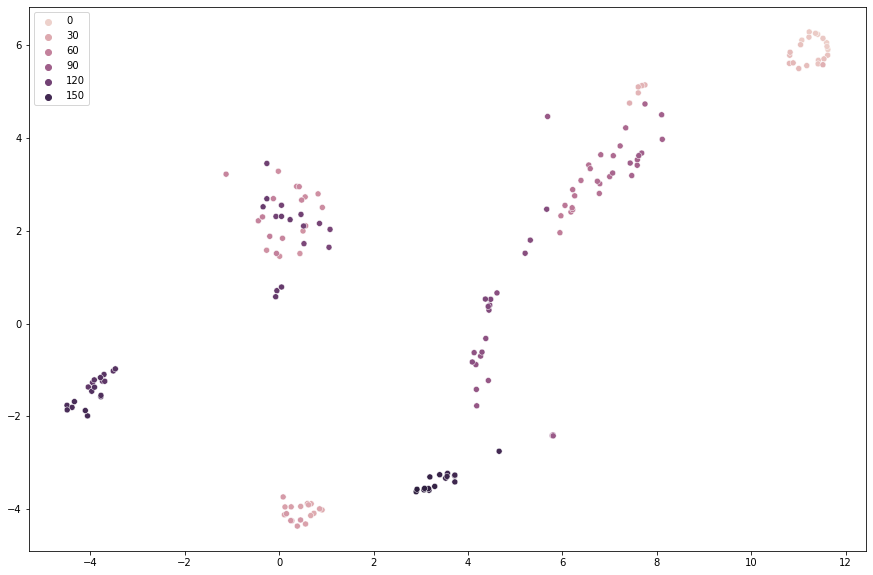

In [66]:
dbsc = cluster.DBSCAN(eps=2.8, min_samples=1)
kY = dbsc.fit_predict(X)

plt.figure(figsize=(15,10))
sns.scatterplot(x=Y[:, 0], y=Y[:, 1], hue=kY, alpha=1)

metrics.adjusted_rand_score(kY, y)